<a href="https://colab.research.google.com/github/Sheraz55/Deep-learning-assignments/blob/main/Advanced_BHP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

**UPLOADING DATA**

In [2]:
!unzip "/content/house-prices-advanced-regression-techniques.zip"

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


**READ DATA**

In [3]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [4]:
print(train_data.shape,test_data.shape)

(1460, 81) (1459, 80)


In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**DATA VISUALIZATION**

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Seperating test id for later use**

In [9]:
test_id=test_data['Id']
train_id = train_data['Id']

**Droping Id column as it takes no part in sale price.**

In [10]:
train_data.drop('Id',axis=1,inplace=True)
test_data.drop('Id',axis=1,inplace=True)

In [11]:
print(train_data.shape,test_data.shape)

(1460, 80) (1459, 79)


**Heat map to see the correlation of sale price with other parameters**

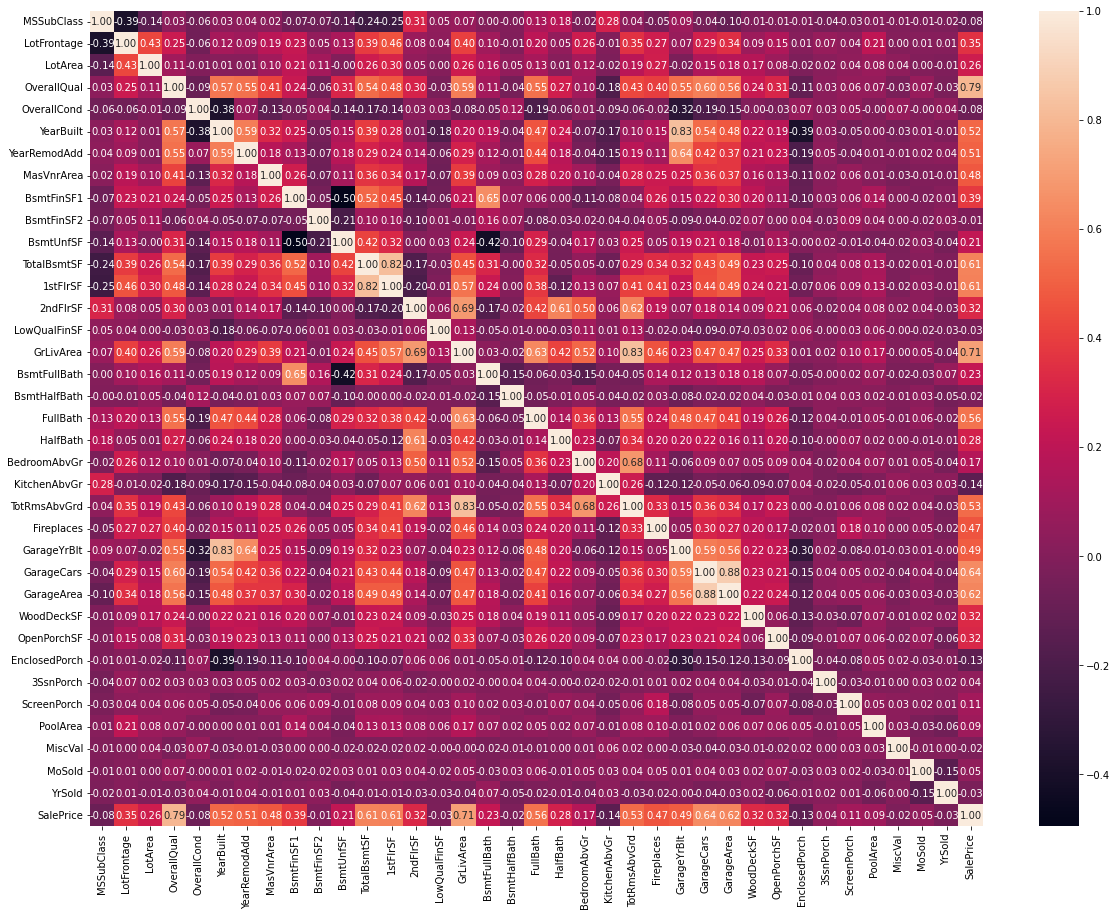

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True,fmt='.2f')
plt.show()

**DATA CLEANING (Sort parameters that have more than 50% correlation with sale price)**

In [13]:
train_data_corr_percentage=train_data.corr().iloc[-1]
train_data_corr_percentage[train_data_corr_percentage > 0.5].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

**Pairplot high correlation features to analyse outliers**

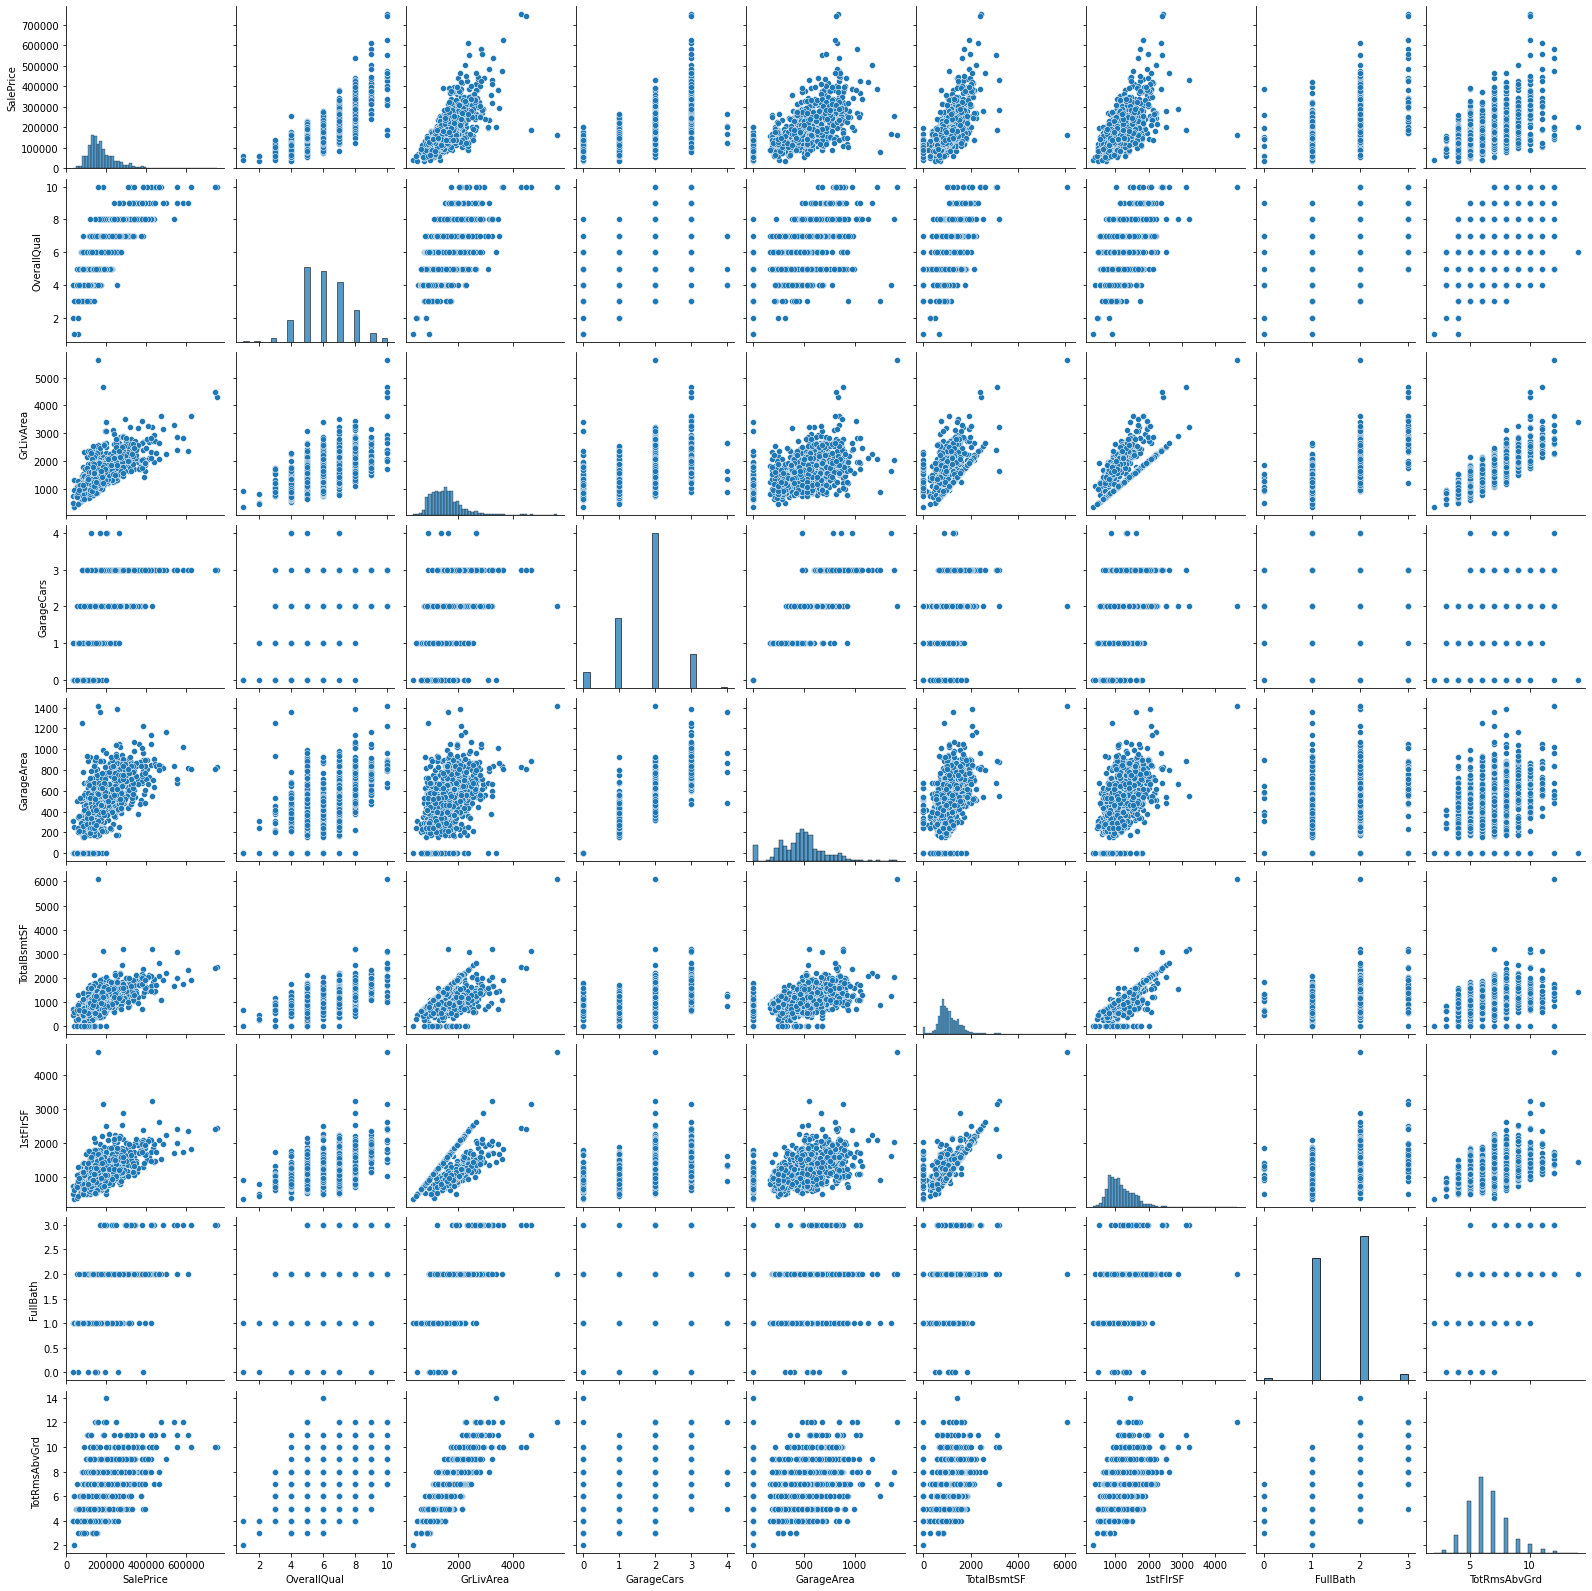

In [14]:
high_corr_cols=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd']   
sns.pairplot(train_data[high_corr_cols])
plt.show()

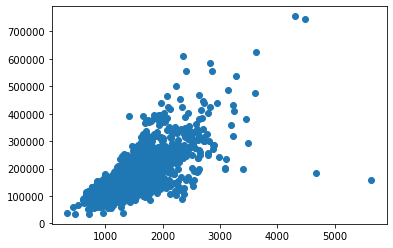

In [15]:
plt.scatter(train_data['GrLivArea'],train_data['SalePrice'])
plt.show()

**Removing GrLivArea features whose value is greater than 4000 So that data scatters against saleprice**

In [16]:
train_data.drop(train_data[train_data['GrLivArea']>4000].index,inplace=True)

In [17]:
train_data.shape

(1456, 80)

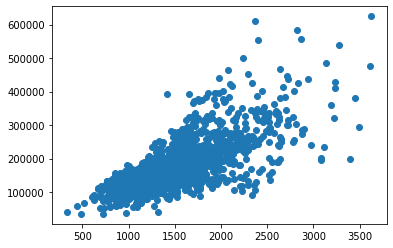

In [18]:
plt.scatter(train_data['GrLivArea'],train_data['SalePrice'])
plt.show()

**Again pairplot to analyse data**

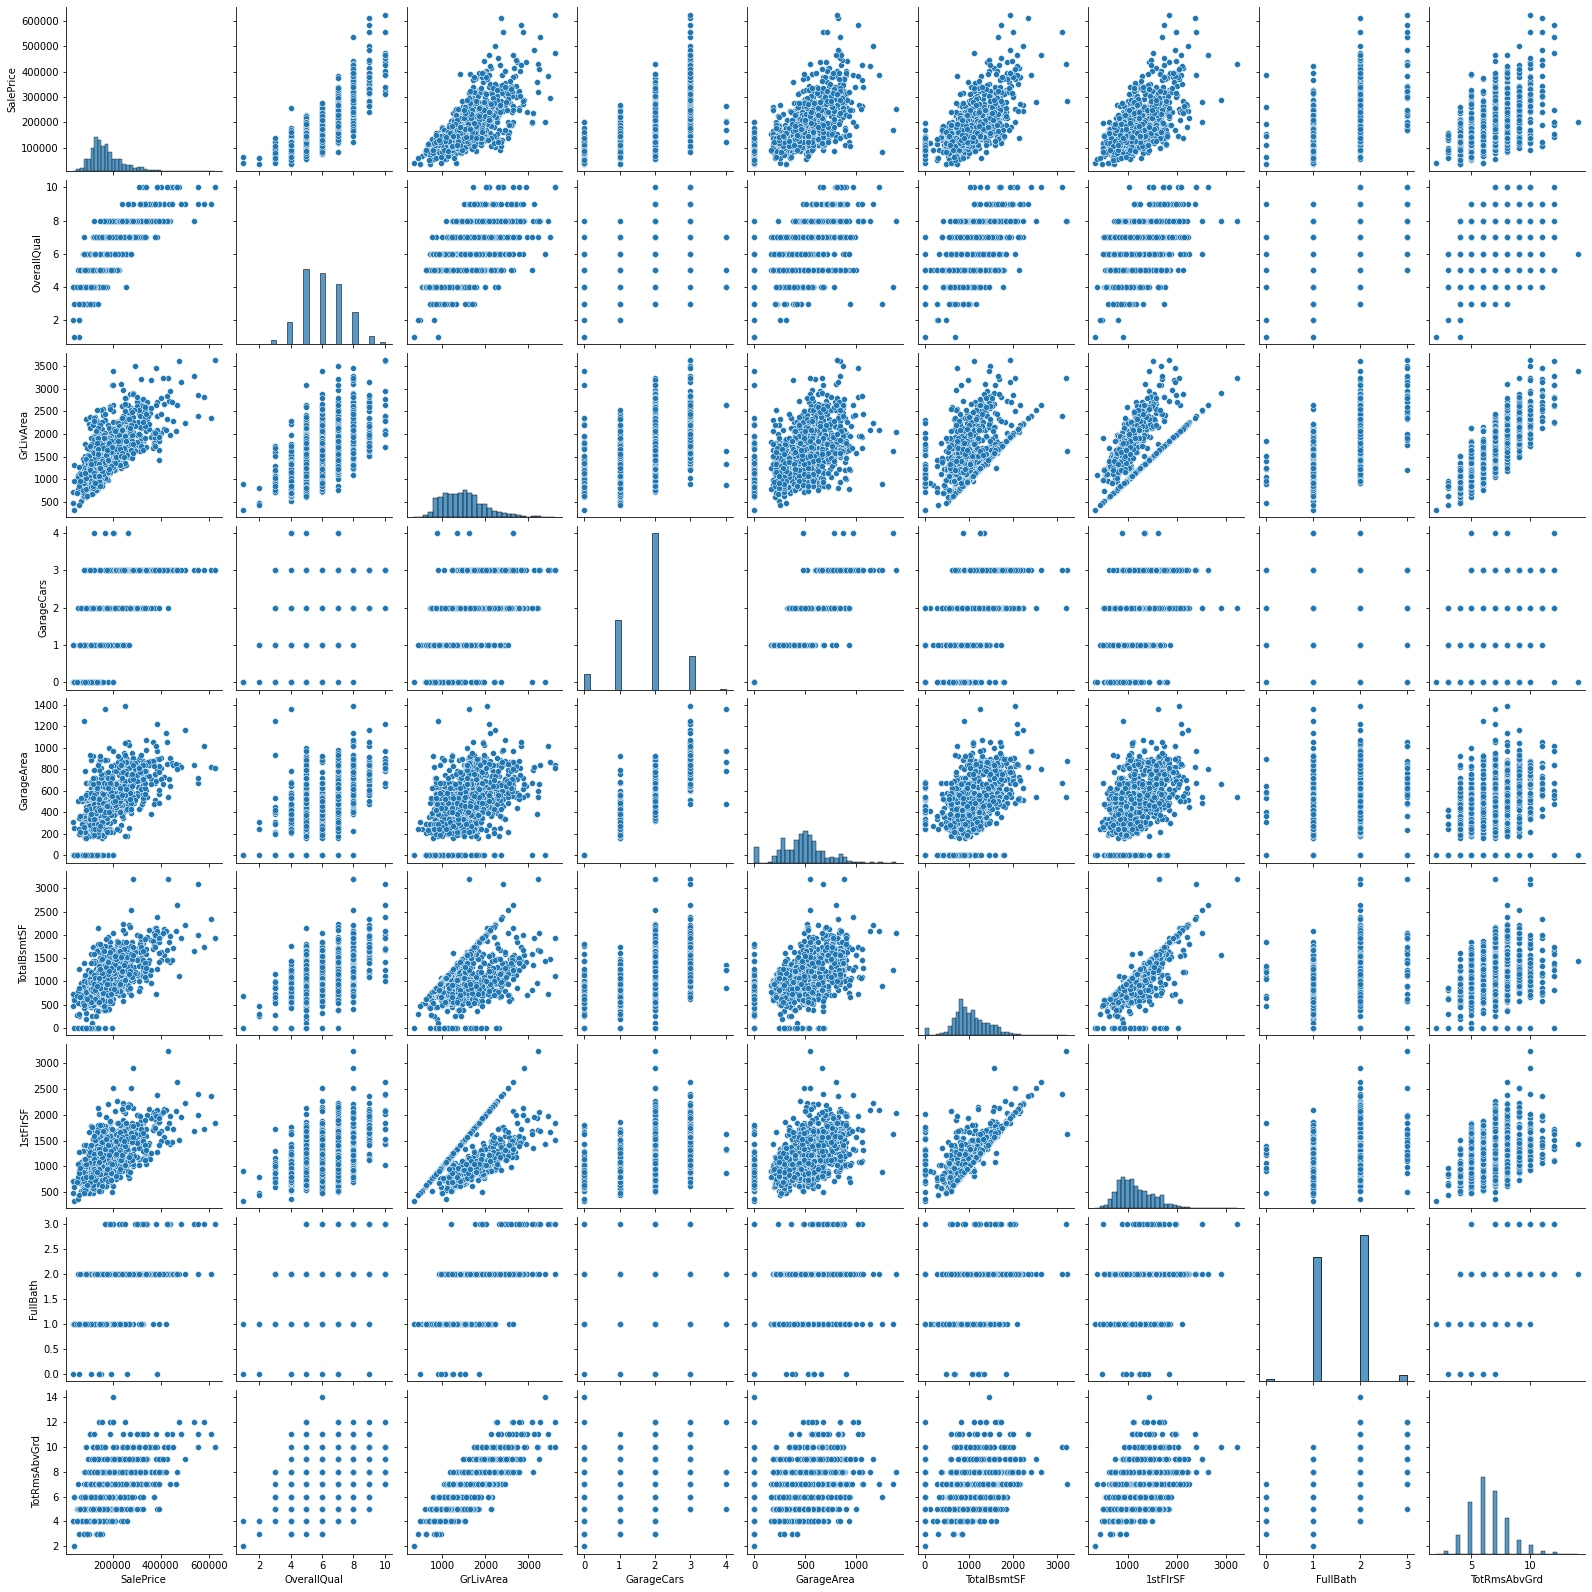

In [19]:
high_corr_cols=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd']   
sns.pairplot(train_data[high_corr_cols])
plt.show()

**Combine train test data to ease data cleaning and pre-processing**

In [20]:
both_train_test=pd.concat((train_data,test_data),axis=0,sort=False)
both_train_test.shape

(2915, 80)

In [21]:
both_train_test.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


**Checking Null values**

In [22]:
train_data.isnull().values.any()

True

In [23]:
both_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2915 non-null   int64  
 1   MSZoning       2911 non-null   object 
 2   LotFrontage    2429 non-null   float64
 3   LotArea        2915 non-null   int64  
 4   Street         2915 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2915 non-null   object 
 7   LandContour    2915 non-null   object 
 8   Utilities      2913 non-null   object 
 9   LotConfig      2915 non-null   object 
 10  LandSlope      2915 non-null   object 
 11  Neighborhood   2915 non-null   object 
 12  Condition1     2915 non-null   object 
 13  Condition2     2915 non-null   object 
 14  BldgType       2915 non-null   object 
 15  HouseStyle     2915 non-null   object 
 16  OverallQual    2915 non-null   int64  
 17  OverallCond    2915 non-null   int64  
 18  YearBuil

**Find % of null values in each parameter**

In [24]:
data_null=((both_train_test.isnull().sum()/len(both_train_test))*100).sort_values(ascending=False)
data_null

PoolQC           99.725557
MiscFeature      96.397942
Alley            93.207547
Fence            80.445969
SalePrice        50.051458
                   ...    
1stFlrSF          0.000000
CentralAir        0.000000
SaleCondition     0.000000
Heating           0.000000
MSSubClass        0.000000
Length: 80, dtype: float64

In [25]:
data_null_index=data_null[data_null !=0].index
print(data_null_index.shape)

(35,)


In [26]:
data_null[data_null !=0]

PoolQC          99.725557
MiscFeature     96.397942
Alley           93.207547
Fence           80.445969
SalePrice       50.051458
FireplaceQu     48.713551
LotFrontage     16.672384
GarageCond       5.454545
GarageYrBlt      5.454545
GarageQual       5.454545
GarageFinish     5.454545
GarageType       5.385935
BsmtCond         2.813036
BsmtExposure     2.813036
BsmtQual         2.778731
BsmtFinType2     2.744425
BsmtFinType1     2.710120
MasVnrType       0.823328
MasVnrArea       0.789022
MSZoning         0.137221
Utilities        0.068611
Functional       0.068611
BsmtFullBath     0.068611
BsmtHalfBath     0.068611
GarageCars       0.034305
BsmtFinSF2       0.034305
Exterior2nd      0.034305
GarageArea       0.034305
TotalBsmtSF      0.034305
BsmtUnfSF        0.034305
BsmtFinSF1       0.034305
Exterior1st      0.034305
KitchenQual      0.034305
SaleType         0.034305
Electrical       0.034305
dtype: float64

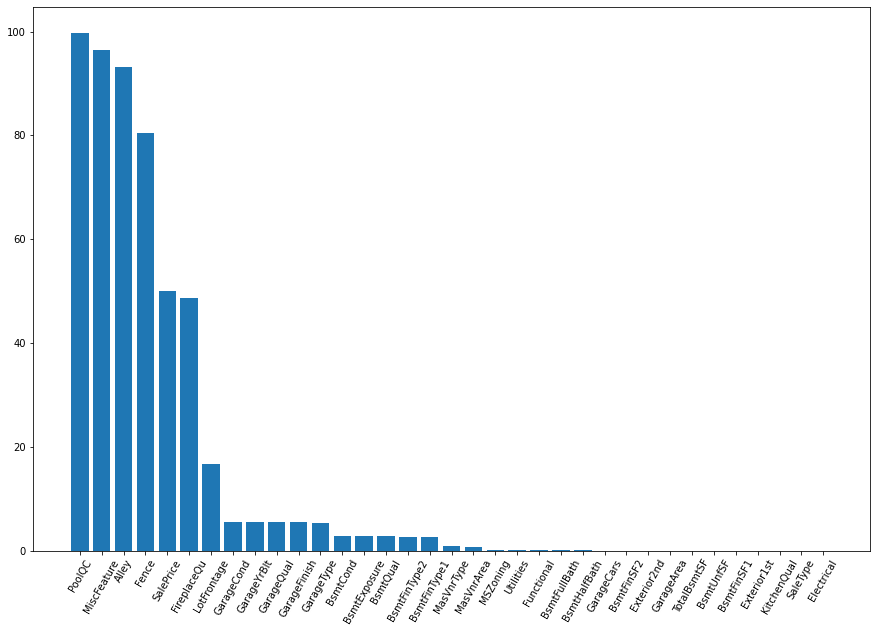

In [27]:
plt.figure(figsize=(15,10))
plt.bar(data_null_index,data_null[data_null_index])
plt.xticks(rotation=60)
plt.show()

In [28]:
data_null_index=list(data_null_index)
data_null_index

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'SalePrice',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageYrBlt',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType2',
 'BsmtFinType1',
 'MasVnrType',
 'MasVnrArea',
 'MSZoning',
 'Utilities',
 'Functional',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'BsmtFinSF2',
 'Exterior2nd',
 'GarageArea',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'Exterior1st',
 'KitchenQual',
 'SaleType',
 'Electrical']

**Analysing correlation coeffecients of columns with null variables by heat map**

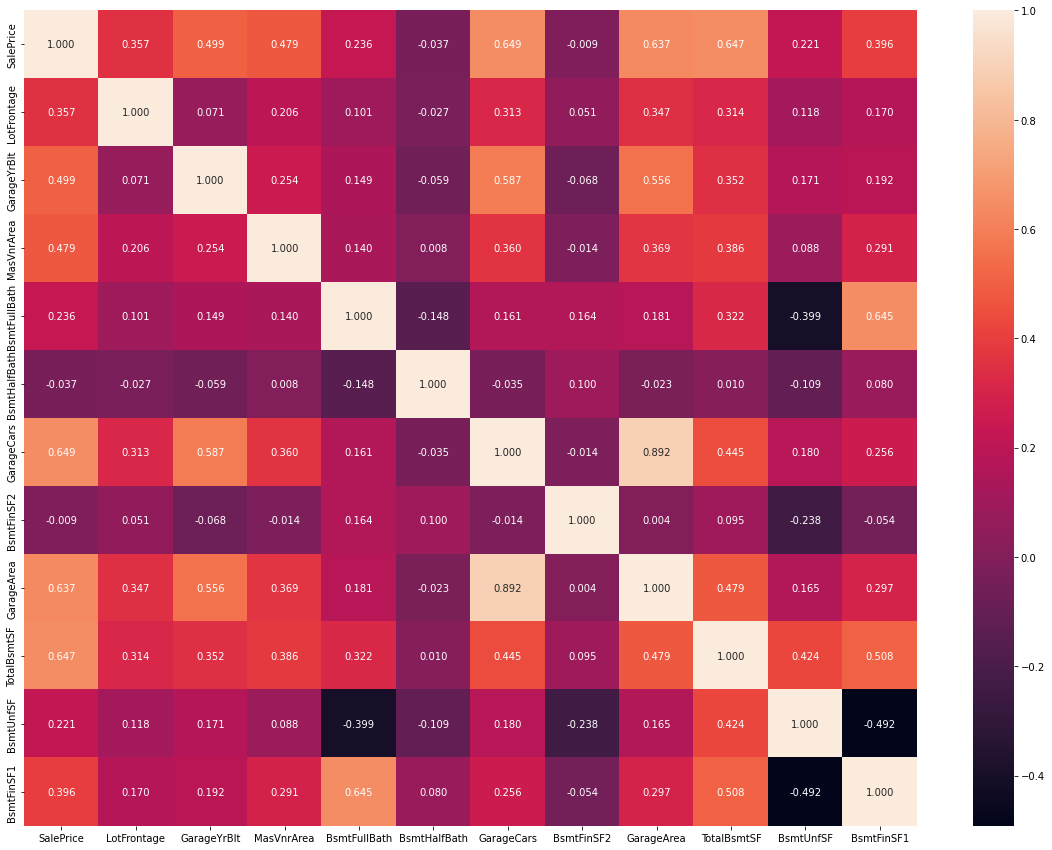

In [29]:
corr_data=both_train_test[data_null_index].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_data,annot=True,fmt='.3f')
plt.show()

**Filtering null columns with numeric dtypes for data imputation (process of replacing missing data with substituted values) purposes**

In [30]:
num_col_null=both_train_test[data_null_index].select_dtypes(include=np.number).columns.tolist()
print(num_col_null.pop(0))
print(num_col_null)

SalePrice
['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'BsmtFinSF2', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1']


**Iterating numeric null columns with mean to fill empty items**

In [31]:
for n in num_col_null:
    both_train_test[n].fillna(value=both_train_test[n].mean(),inplace=True)

In [32]:
both_train_test.isnull().any().sum()

24

In [33]:
print(len(num_col_null))
print(len(data_null_index))

11
35


**Filtering categorical (Categorical variables are those that provide groupings that may have no logical order, or a logical order with inconsistent) columns for data imputation purposes**

In [34]:
non_num_cols=((both_train_test.isnull().sum()/len(both_train_test))*100).sort_values(ascending=False)
non_num_cols=non_num_cols[non_num_cols !=0].index
len(non_num_cols)
print(non_num_cols)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'SalePrice', 'FireplaceQu',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'KitchenQual',
       'Electrical', 'Exterior2nd', 'SaleType', 'Exterior1st'],
      dtype='object')


**Filling the categorical columns with mean or the mode values**

In [35]:
both_train_test['PoolQC']=both_train_test['PoolQC'].fillna(value='None')
both_train_test['MiscFeature']=both_train_test['MiscFeature'].fillna(value='None')
both_train_test['Alley']=both_train_test['Alley'].fillna(value='None')
both_train_test['Fence']=both_train_test['Fence'].fillna(value='None')
both_train_test['FireplaceQu']=both_train_test['FireplaceQu'].fillna(value='None')

In [36]:
for col in ('BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1'):
    both_train_test[col]=both_train_test[col].fillna(value='None')

In [37]:
both_train_test['MasVnrType']=both_train_test['MasVnrType'].fillna(value='None')
both_train_test['MSZoning']=both_train_test['MSZoning'].fillna(value='None')

**Drop utilities**

In [38]:
both_train_test.drop('Utilities',axis=1,inplace=True)
both_train_test['Electrical']=both_train_test['Electrical'].fillna(value=both_train_test['Electrical'].mode()[0])
both_train_test['KitchenQual']=both_train_test['KitchenQual'].fillna(value=both_train_test['KitchenQual'].mode()[0])
both_train_test['Exterior2nd']=both_train_test['Exterior2nd'].fillna(value=both_train_test['Exterior2nd'].mode()[0])
both_train_test['SaleType']=both_train_test['SaleType'].fillna(value=both_train_test['SaleType'].mode()[0])
both_train_test['Exterior1st']=both_train_test['Exterior1st'].fillna(value=both_train_test['Exterior1st'].mode()[0])

In [39]:
both_train_test_null_check=(both_train_test.isnull().any().sum()/len(both_train_test)*100)
both_train_test_null_check

0.2058319039451115

**Separate out saleprice column for encoding purposes**

In [40]:
y=both_train_test['SalePrice'][:(both_train_test.shape[0]-test_data.shape[0])]
y[:10]

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
5    143000.0
6    307000.0
7    200000.0
8    129900.0
9    118000.0
Name: SalePrice, dtype: float64

In [41]:
both_train_test.drop('SalePrice',axis=1,inplace=True)


In [42]:
print(both_train_test.shape)

(2915, 78)


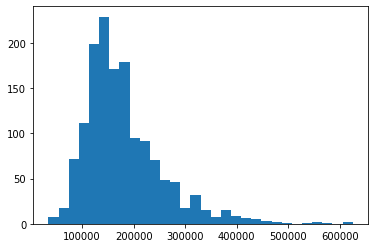

In [43]:
plt.hist(train_data['SalePrice'],bins=30)
plt.show()

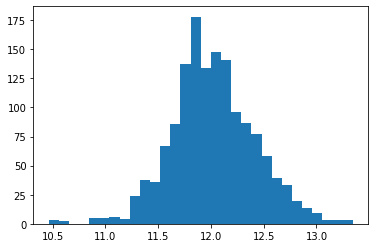

In [44]:
train_data['SalePrice']=np.log1p(train_data['SalePrice'])
plt.hist(train_data['SalePrice'],bins=30)
plt.show()

**Converting categorical column to str from numeric**

In [45]:
both_train_test['MSSubClass'] =both_train_test['MSSubClass'].astype(str)
both_train_test['OverallCond']=both_train_test['OverallCond'].astype(str)
both_train_test['YrSold']=both_train_test['YrSold'].astype(str)
both_train_test['MoSold']=both_train_test['MoSold'].astype(str)

**Importing encoder for converting categorical features**
Standard Scaler removes the median and scales the data according to the quantile range 

In [46]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
ss=StandardScaler()

In [47]:
both_train_test.shape

(2915, 78)

**Selecting categorical columns separately for encoding purpose**

In [48]:
# for label encoding we have to find categoricl columns
cat_col=both_train_test.select_dtypes(include='object').columns.tolist()
len(cat_col)

46

In [49]:
for col in cat_col:
    both_train_test[col] = le.fit_transform(both_train_test[col].astype(str))


In [50]:
both_train_test.select_dtypes(include='number')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,4,65.0,8450,1,1,3,3,4,0,5,2,2,0,5,7,4,2003,2003,1,0,12,13,1,196.0,2,4,2,2,4,3,2,706.0,6,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,1,2003.000000,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,1,0,4,2,8,4
1,5,4,80.0,9600,1,1,3,3,2,0,24,1,2,0,2,6,7,1976,1976,1,0,8,8,2,0.0,3,4,1,2,4,1,0,978.0,6,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,1,1976.000000,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,1,0,7,1,8,4
2,10,4,68.0,11250,1,1,0,3,4,0,5,2,2,0,5,7,4,2001,2002,1,0,12,13,1,162.0,2,4,2,2,4,2,2,486.0,6,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,1,2001.000000,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,1,0,11,2,8,4
3,11,4,60.0,9550,1,1,0,3,0,0,6,2,2,0,5,7,4,1915,1970,1,0,13,15,2,0.0,3,4,0,4,1,3,0,216.0,6,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,1998.000000,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,1,0,4,0,8,0
4,10,4,84.0,14260,1,1,0,3,2,0,15,2,2,0,5,8,4,2000,2000,1,0,12,13,1,350.0,2,4,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,1,2000.000000,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,1,0,3,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2,5,21.0,1936,1,1,3,3,4,0,10,2,2,3,5,4,6,1970,1970,1,0,5,5,2,0.0,3,4,1,4,4,3,6,0.0,6,0.0,546.0,546.0,1,2,1,4,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,3,6,1978.079826,3,0.0,0.0,5,5,2,0,0,0,0,0,0,3,4,1,0,8,0,8,4
1455,2,5,21.0,1894,1,1,3,3,4,0,10,2,2,4,5,4,4,1970,1970,1,0,5,5,2,0.0,3,4,1,4,4,3,5,252.0,6,0.0,294.0,546.0,1,4,1,4,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,3,4,1970.000000,2,1.0,286.0,4,4,2,0,24,0,0,0,0,3,4,1,0,6,0,8,0
1456,5,4,160.0,20000,1,1,3,3,4,0,11,2,2,0,2,5,6,1960,1996,1,0,12,13,2,0.0,3,4,1,4,4,3,0,1224.0,6,0.0,0.0,1224.0,1,0,1,4,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,5,1960.000000,2,2.0,576.0,4,4,2,474,0,0,0,0,0,3,4,1,0,11,0,8,0
1457,14,4,62.0,10441,1,1,3,3,4,0,11,2,2,0,6,5,4,1992,1992,1,0,6,15,2,0.0,3,4,2,2,4,0,2,337.0,6,0.0,575.0,912.0,1,4,1,4,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,3,6,1978.079826,3,0.0,0.0,5,5,2,80,32,0,0,0,0,3,2,3,700,9,0,8,4


**Again converting encoded features into str for creating dummy variables**

In [51]:
for c in cat_col:
    both_train_test[c]=both_train_test[c].astype(str)

In [52]:
both_train_test.select_dtypes(include='object')

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,10,4,1,1,3,3,4,0,5,2,2,0,5,4,1,0,12,13,1,2,4,2,2,4,3,2,6,1,0,1,4,2,6,3,1,1,4,4,2,3,4,1,4,2,8,4
1,5,4,1,1,3,3,2,0,24,1,2,0,2,7,1,0,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,1,4,4,2,3,4,1,7,1,8,4
2,10,4,1,1,0,3,4,0,5,2,2,0,5,4,1,0,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,5,1,1,4,4,2,3,4,1,11,2,8,4
3,11,4,1,1,0,3,0,0,6,2,2,0,5,4,1,0,13,15,2,3,4,0,4,1,3,0,6,1,2,1,4,2,6,2,5,2,4,4,2,3,4,1,4,0,8,0
4,10,4,1,1,0,3,2,0,15,2,2,0,5,4,1,0,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,1,4,4,2,3,4,1,3,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2,5,1,1,3,3,4,0,10,2,2,3,5,6,1,0,5,5,2,3,4,1,4,4,3,6,6,1,2,1,4,3,6,3,6,3,5,5,2,3,4,1,8,0,8,4
1455,2,5,1,1,3,3,4,0,10,2,2,4,5,4,1,0,5,5,2,3,4,1,4,4,3,5,6,1,4,1,4,3,6,3,4,2,4,4,2,3,4,1,6,0,8,0
1456,5,4,1,1,3,3,4,0,11,2,2,0,2,6,1,0,12,13,2,3,4,1,4,4,3,0,6,1,0,1,4,3,6,5,5,2,4,4,2,3,4,1,11,0,8,0
1457,14,4,1,1,3,3,4,0,11,2,2,0,6,4,1,0,6,15,2,3,4,2,2,4,0,2,6,1,4,1,4,3,6,3,6,3,5,5,2,3,2,3,9,0,8,4


In [53]:
#get dummy categorical features
data_dummy=both_train_test.copy()
data_dummy=pd.get_dummies(data_dummy,drop_first=True)
data_dummy.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_1,MSSubClass_10,MSSubClass_11,MSSubClass_12,MSSubClass_13,MSSubClass_14,MSSubClass_15,MSSubClass_2,...,PavedDrive_2,PoolQC_1,PoolQC_2,PoolQC_3,Fence_1,Fence_2,Fence_3,Fence_4,MiscFeature_1,MiscFeature_2,MiscFeature_3,MiscFeature_4,MoSold_1,MoSold_10,MoSold_11,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_1,YrSold_2,YrSold_3,YrSold_4,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,65.0,8450,7,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [54]:
num_col=list(set(both_train_test.columns)-set(cat_col))
num_col

['2ndFlrSF',
 'LowQualFinSF',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'OverallQual',
 'BsmtFinSF1',
 'Fireplaces',
 'BsmtHalfBath',
 'HalfBath',
 'YearRemodAdd',
 '3SsnPorch',
 'KitchenAbvGr',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'WoodDeckSF',
 'GarageCars',
 'YearBuilt',
 'OpenPorchSF',
 'MasVnrArea',
 'ScreenPorch',
 'GrLivArea',
 'BedroomAbvGr',
 'BsmtFullBath',
 'BsmtFinSF2',
 'PoolArea',
 'FullBath',
 'LotFrontage',
 'LotArea',
 'GarageYrBlt',
 'MiscVal',
 'EnclosedPorch',
 'GarageArea']

In [55]:
data_ss=data_dummy.copy()

**Verify again any null value**

In [56]:
for n in num_col_null:
    both_train_test[n].fillna(value=both_train_test[n].mean(),inplace=True)
both_train_test.isnull().any().sum()

0

Data scaling involves calculating the mean and standard deviation of each variable and using these values to scale the values to have a mean of zero and a standard deviation of one, a so-called “standard normal” probability distribution. This process is called standardization and is most useful when input variables have a Gaussian probability distribution.

Standardization is calculated by subtracting the mean value and dividing by the standard deviation.

value = (value – mean) / stdev
Sometimes an input variable may have outlier values. These are values on the edge of the distribution that may have a low probability of occurrence, yet are overrepresented for some reason. Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers.

In [81]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
data_rs=rs.fit_transform(data_ss)
data_rs.shape

(2915, 293)

In [82]:
from sklearn.model_selection import KFold,train_test_split
train_rs=data_rs[:(data_rs.shape[0] -test_data.shape[0] )]
test_rs=data_rs[train_rs.shape[0]:]

In [83]:
train_rs.shape

(1456, 293)

In [84]:
test_rs.shape

(1459, 293)

In [85]:
train_ss=data_ss[:(data_ss.shape[0] -test_data.shape[0] )]
test_ss=data_ss[train_ss.shape[0]:]

In [86]:
y_rs=rs.fit_transform(np.array(y).reshape(-1,1))
y_rs.shape

(1456, 1)

In [87]:
xtrain,xtest,ytrain,ytest=train_test_split(train_rs,y_rs,test_size=0.2,random_state=42)
xtrain1,xtest1,ytrain1,ytest1=train_test_split(train_ss,y,random_state=42)


In [88]:
kfold=KFold(n_splits=8,shuffle=True,random_state=42)

In [89]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,)
])
model.compile(loss='mean_squared_error',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['mse'])

In [90]:
history=model.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
37/37 [==============================] - 1s 7ms/step - loss: 22.2503 - mse: 22.2503 - val_loss: 1.7440 - val_mse: 1.7440
Epoch 2/20
37/37 [==============================] - 0s 3ms/step - loss: 32.5035 - mse: 32.5035 - val_loss: 3.9339 - val_mse: 3.9339
Epoch 3/20
37/37 [==============================] - 0s 3ms/step - loss: 6.2247 - mse: 6.2247 - val_loss: 2.0234 - val_mse: 2.0234
Epoch 4/20
37/37 [==============================] - 0s 3ms/step - loss: 26.3788 - mse: 26.3788 - val_loss: 1.7904 - val_mse: 1.7904
Epoch 5/20
37/37 [==============================] - 0s 3ms/step - loss: 48.6909 - mse: 48.6909 - val_loss: 0.3238 - val_mse: 0.3238
Epoch 6/20
37/37 [==============================] - 0s 3ms/step - loss: 0.6620 - mse: 0.6620 - val_loss: 0.2561 - val_mse: 0.2561
Epoch 7/20
37/37 [==============================] - 0s 3ms/step - loss: 0.4024 - mse: 0.4024 - val_loss: 0.2613 - val_mse: 0.2613
Epoch 8/20
37/37 [==============================] - 0s 3ms/step - loss: 3.3644 - m

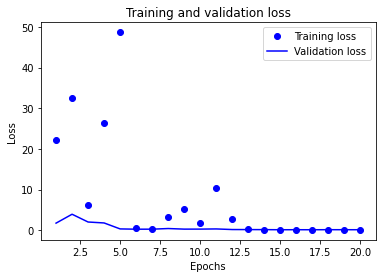

In [91]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [92]:
model.evaluate(xtest,ytest)

10/10 [==============================] - 0s 2ms/step - loss: 0.1244 - mse: 0.1244


[0.12438444793224335, 0.12438444793224335]

In [93]:
y_pred=model.predict(xtest)

In [94]:
rmse=tf.keras.losses.mean_squared_error(y_pred,ytest)
rmse=np.mean(rmse)
rmse=np.sqrt(rmse)
rmse

0.3526817810366355

In [95]:
sub_pred=model.predict(test_ss)
sub_new=pd.DataFrame(sub_pred,index=test_id)
sub_new=sub_new.rename(columns={0:'SalePrice'})
sub_new.head()

,SalePrice
Id,
1461,1456.430054
1462,1296.956909
1463,1792.426147
1464,1707.196899
1465,1452.462402


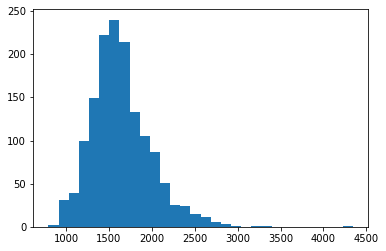

In [96]:
plt.hist(sub_pred,bins=30)
plt.show()

In [97]:
from keras import models
from keras import layers
from keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',  input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [102]:
history1=model.fit(xtrain,ytrain,epochs=25,validation_data=(xtest,ytest))

Epoch 1/25
37/37 [==============================] - 0s 3ms/step - loss: 0.0410 - mse: 0.0410 - val_loss: 0.1181 - val_mse: 0.1181
Epoch 2/25
37/37 [==============================] - 0s 3ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.1194 - val_mse: 0.1194
Epoch 3/25
37/37 [==============================] - 0s 3ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.1112 - val_mse: 0.1112
Epoch 4/25
37/37 [==============================] - 0s 3ms/step - loss: 0.1598 - mse: 0.1598 - val_loss: 0.1215 - val_mse: 0.1215
Epoch 5/25
37/37 [==============================] - 0s 3ms/step - loss: 0.0479 - mse: 0.0479 - val_loss: 0.1128 - val_mse: 0.1128
Epoch 6/25
37/37 [==============================] - 0s 3ms/step - loss: 0.0623 - mse: 0.0623 - val_loss: 0.1253 - val_mse: 0.1253
Epoch 7/25
37/37 [==============================] - 0s 3ms/step - loss: 0.7100 - mse: 0.7100 - val_loss: 0.2880 - val_mse: 0.2880
Epoch 8/25
37/37 [==============================] - 0s 3ms/step - loss: 9.0110 - mse: 9.01

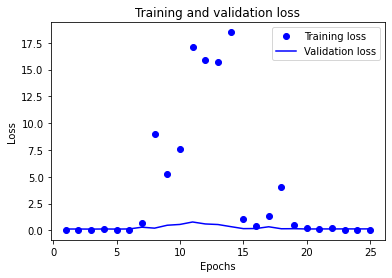

In [103]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [105]:
model.evaluate(xtest,ytest)
y_pred1=model.predict(xtest)
rmse1=tf.keras.losses.mean_squared_error(y_pred1,ytest)
rmse1=np.mean(rmse1)
rmse1=np.sqrt(rmse1)
print(rmse1)
sub_pred1=model.predict(test_ss)
sub_new=pd.DataFrame(sub_pred1,index=test_id)
sub_new=sub_new.rename(columns={0:'SalePrice'})
sub_new.head(10)

10/10 [==============================] - 0s 2ms/step - loss: 0.1309 - mse: 0.1309
0.361796088811102


,SalePrice
Id,
1461,2120.267090
1462,2211.911621
1463,2610.016357
1464,2367.000977
1465,1893.647095
1466,2196.206787
1467,2185.990967
1468,2011.921631
1469,2377.282715


In [101]:

# processing data
dataframe = pd.DataFrame(sub_pred,index=test_id)
# converting to csv
dataframe.to_csv('submission.csv')

In [107]:
dataframe1 = pd.DataFrame(sub_pred1,index=test_id)
# converting to csv
dataframe.to_csv('submission1.csv')